In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metad

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
training_set = tf.keras.utils.image_dataset_from_directory(
        'F:/ML/train',
        labels = 'inferred',
        label_mode = 'categorical',
        class_names=None,
        color_mode = 'rgb',
        batch_size = 32,
        image_size = (64,64),
        shuffle = True,
        seed = None,
        validation_split = None,
        subset = None,
        interpolation = 'bilinear',
        follow_links = False,
        crop_to_aspect_ratio = False
)                                              

Found 3115 files belonging to 36 classes.


In [15]:
validation_set = tf.keras.utils.image_dataset_from_directory(
        'F:/ML/validation',
        labels = 'inferred',
        label_mode = 'categorical',
        class_names=None,
        color_mode = 'rgb',
        batch_size = 32,
        image_size = (64,64),
        shuffle = True,
        seed = None,
        validation_split = None,
        subset = None,
        interpolation = 'bilinear',
        follow_links = False,
        crop_to_aspect_ratio = False
)                                              

Found 351 files belonging to 36 classes.


In [16]:
#Building Model
#Creating a CNN Model
cnn = tf.keras.models.Sequential()

In [17]:
#Building Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [18]:
#Building Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [19]:
#To avoid Overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

In [20]:
#Flatten the matrix
cnn.add(tf.keras.layers.Flatten())

In [21]:
#Creating Neural Networks
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
#Output layer 
# Dense layer takes the input from the previous layers and produces the output . Dense layer ia a fully, deeply connected neural network layer
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [23]:
#Compilation
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
#Training the model and fitting it 
training_history = cnn.fit(x=training_set, validation_data = validation_set, epochs = 30)

Epoch 1/30
98/98 [==============================] - 80s 769ms/step - loss: 1.1160 - accuracy: 0.8022 - val_loss: 1.4141 - val_accuracy: 0.8889
Epoch 2/30
98/98 [==============================] - 74s 712ms/step - loss: 1.2980 - accuracy: 0.7997 - val_loss: 1.4383 - val_accuracy: 0.9088
Epoch 3/30
98/98 [==============================] - 78s 754ms/step - loss: 1.0495 - accuracy: 0.8186 - val_loss: 2.5415 - val_accuracy: 0.7863
Epoch 4/30
98/98 [==============================] - 77s 740ms/step - loss: 1.0301 - accuracy: 0.8116 - val_loss: 1.5853 - val_accuracy: 0.9003
Epoch 5/30
98/98 [==============================] - 79s 757ms/step - loss: 1.0039 - accuracy: 0.8286 - val_loss: 1.3953 - val_accuracy: 0.9316
Epoch 6/30
98/98 [==============================] - 82s 786ms/step - loss: 1.0011 - accuracy: 0.8315 - val_loss: 1.9211 - val_accuracy: 0.8376
Epoch 7/30
98/98 [==============================] - 84s 802ms/step - loss: 1.0374 - accuracy: 0.8283 - val_loss: 1.2938 - val_accuracy: 0.9259

In [26]:
# SAVING THE MODEL
cnn.save('trained_model.h5')

In [27]:
# CREATING JSON FILE FOR RECORDING HISTORY
import json
with open('trained_history.json','w') as f:
    json.dump(training_history.history,f)


In [28]:
print(training_history)

In [31]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
print("Training Accuracy {} %".format(training_history.history['accuracy'][-1]))

Training Accuracy 0.8943819999694824 %


In [35]:
print("Validation Accuracy {} %".format(training_history.history['val_accuracy'][-1]))

Validation Accuracy 0.8774929046630859 %


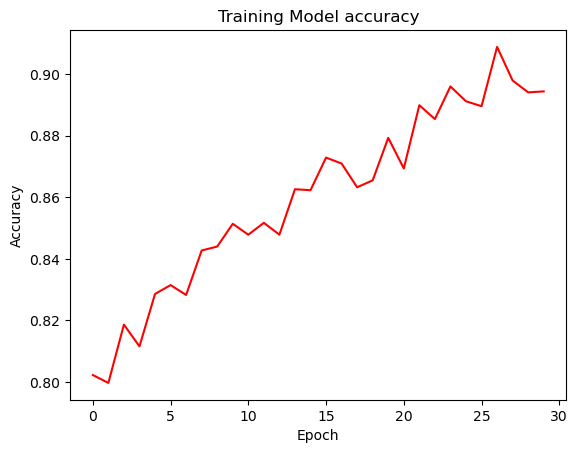

In [40]:
plt.plot(training_history.history['accuracy'], color = 'red')
plt.title('Training Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


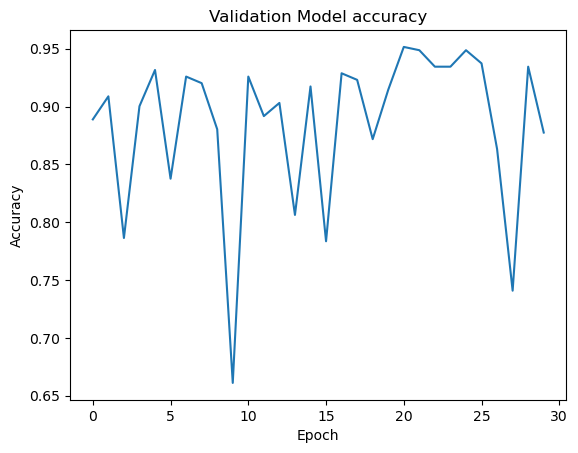

In [45]:
plt.plot(training_history.history['val_accuracy'])
plt.title('Validation Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


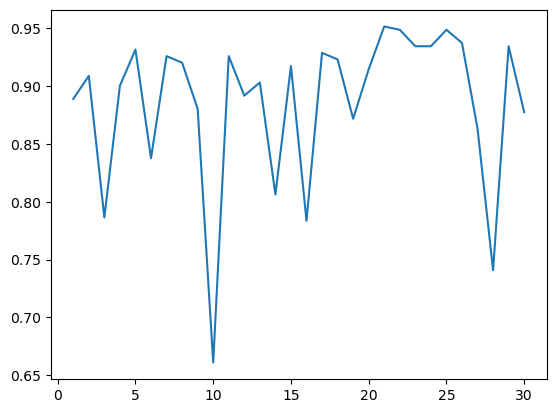

In [46]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['val_accuracy'])
plt.show()